C:\Temp/ipykernel_22976/2986943850.py:59: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


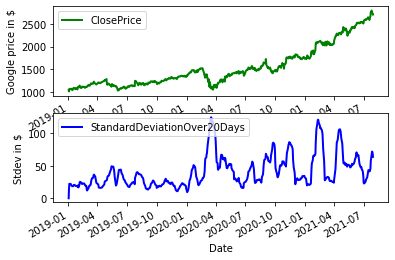

In [5]:
# Implementing standard derivatives

import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import math as math
from pandas_datareader import data


start_data = '2019-01-01'
end_data = '2021-08-01'
FILENAME = 'baba_data_2019_2021.pkl'

try:
    goog_data = pd.read_pickle(FILENAME)
except FileNotFoundError:
    goog_data = data.DataReader('BABA', 'yahoo', start_data, end_data)
    goog_data.to_pickle(FILENAME)

close = goog_data['Close']

time_period = 20

history = []
sma_values = []
stdev_values = []

for close_price in close:
    history.append(close_price)
    if len(history) > time_period:
        del(history[0])
    
    sma = stats.mean(history)
    sma_values.append(sma)

    variance = 0
    for hist_price in history:
        variance = variance + ((hist_price - sma) ** 2)
    
    stdev = math.sqrt(variance / len(history))
    stdev_values.append(stdev)

goog_data = goog_data.assign(
    ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(
    StandardDeviationOver20Days=pd.Series(stdev_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
stdev = goog_data['StandardDeviationOver20Days']

fig = plt.figure()

ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)

ax2 = fig.add_subplot(212, ylabel='Stdev in $')
stdev.plot(ax=ax2, color='b', lw=2., legend=True)

fig.show()